<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Teoría" data-toc-modified-id="Teoría-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Teoría</a></span></li><li><span><a href="#Tipo-test" data-toc-modified-id="Tipo-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tipo test</a></span></li><li><span><a href="#Práctica" data-toc-modified-id="Práctica-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Práctica</a></span><ul class="toc-item"><li><span><a href="#Drawdowns" data-toc-modified-id="Drawdowns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drawdowns</a></span><ul class="toc-item"><li><span><a href="#Cálculo" data-toc-modified-id="Cálculo-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Cálculo</a></span></li><li><span><a href="#Visualización" data-toc-modified-id="Visualización-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Visualización</a></span></li><li><span><a href="#Visualización-sobre-un-tramo-temporal" data-toc-modified-id="Visualización-sobre-un-tramo-temporal-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Visualización sobre un tramo temporal</a></span></li></ul></li></ul></li></ul></div>

## Teoría


Hasta el momento se ha visto como métrica de rendimientos ajustados al reisgo el sharpe ratio, es decir, la relación entre el exceso de rendimiento que se obtiene sobre lo que se puede obtener sin riesgo. En otras palabras el rendimiento excesivo sobre la tasa libre de riesgo por unidad de volatilidad. 

La volatilidad se puede entender como un concepto negativo o positivo ya que ofrece información sobre el nivel de desviación respecto a la media, y si la desviación es positiva no es un indicador negativo.

El Max Drowdown o caída máxima es otra medida de riesgo negativa que informa sobre la posibilidad de perder dinero. Se define como la pérdida máxima que se podría haber experimentado si se hubiera fallado la operación durante el período de operación del sistema. 

Para calcular el Max Dowdown:
- Se utiliza como entrada la serie de retorno.


- Se convierte la serie de retornos al índice de riqueza (__wealth index__). Representado por la línea verde.

    La serie de índice de riqueza representa que hubiese pasado al invertir una cantidad de dinero determinado utilizando la estrategia de inversión a lo largo del tiempo. Como se puede observar en la gráfica anterior existen períodos en los que el rendimiento que a veces sube y otros en los que a veces baja. Si por ejemplo, se hubiese invertido una cantidad de  1000 dolares se hubiesen conseguido tras un período de 40 años una cantidad aproximada de 300.000 dolares. Sin embargo, existen períodos en los que el retorno de inversión era tan alto como 175.000 dolares y otros en los que se redujo a un número mucho menor. 
    
<img src="images/wealthindex.png" width="400" height="200">


    
- Calcular Drowdowns. Este valor se define como la distancia entre el índice de riqueza y los valores de rendimiento. 

- Calcular el valor máximo de los drowdowns. Identificar el valor máximo de perdida de los drowdowns. La razón por la que la medida de Drowdowns es tan utilizada es porque es muy consistente con la pérdida de dinero de la cartera tras haber ganado ya previamente ese dinero. 



Para visualizar los drowdowns se suele representar de la siguiente forma:
- Visualización de la serie temporal de rendimientos junto al índice de riqueza.
- Visualización de la serie temporal de drowdowns.

<img src="images/visualizacion_maxdrowdowns.png" width="400" height="200">


Dado que el el drowdown __es una medida de riesgo__, se puede utilizar para calcular el retorno ajustado al reisgo, es decir, calcular el exceso de rendimiento dividido por el valor del drowdown (previamente se utilizada, por ejemplo, la volatilidad). Al valor obtenido se le conoce como __Calmar Ratio.__ Formalmente, el CR se define como la relación del rendimiento anualizado sobre los últimos 36 meses respecto al Max Drawdown que se obtuvo sobre los 36 meses.


__Desventajas de los drowdowns.__

- Son muy sensibles a dos fuentes de datos, el índice de riqueza y el valor de los retornos.
- En términos de cálculo dependen mucho de la granulanilidad de los dataosprovocando, por ejemplo,que la reducción diaria sea muy diferente a la reducción semanal. El Drawndown diario dispone de peores datos que, por ejemplo, semanalmente y a su vez mensualmente
- Existen mejores métricas con una mayor robustez de este tipo de comportamiento extremo como el VAR y CVAR

<hr style="height:5px;border-width:0;color:orange;background-color:orange">


## Tipo test

__Pregunta 1. ¿El activo A pierde un 1% al mes durante 12 meses y el activo B gana un 1% al mes durante 12 meses. ¿Cuál es el activo más volátil?__

Tampoco. Dado que ambos producen la misma rentabilidad cada mes, sus desviaciones de la media son nulas cada mes, por lo que la volatilidad de ambos activos es 0.


__Pregunta 2. ¿El Drawdown (máxima perdida posible) es una medida del riesgo a la baja (downside risk)?__

Si. Es la pérdida teórica que habrías sufrido si hubieras invertido en el punto máximo y vendido en el punto mínimo (señal de compra; long) o si se hubiera vendido en el punto mínimo y comprado en el punto máximo (señal de venta; short).


__Pregunta 3. Si la tasa libre de riesgo no es negativa en ningún momento de la serie temporal, ¿el Drawdown de una inversión que devuelve el tipo Libre de Riesgo cada mes es cero o tiene un valor muy pequeño?__

Será cero. Dado que el rendimiento de la inversión es siempre positivo, nunca está por debajo de su pico anterior


__Preguntas 4. La reducción calculada a partir de una serie de rentabilidad diaria es siempre mayor o igual que la reducción calculada a partir de la serie mensual correspondiente. ¿Verdadero o falso?__

Verdadero.

<hr style="height:5px;border-width:0;color:orange;background-color:orange">


## Práctica

In [19]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import warnings


# Configuración de librerías
init_notebook_mode(connected=True)  
warnings.filterwarnings("ignore")

In [20]:
df_mem = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header=0, index_col=0, parse_dates=True, na_values=-99.99)
# Formato de la marca temporal
series_date_time =  list()
for date_value in df_mem.index:
    date_value = str(date_value)
    date_value = f'{date_value[:4]}-{date_value[4:]}'
    series_date_time.append(date_value)
    

series_date_time = np.array(series_date_time)
df_mem.index=series_date_time
df_mem.index = pd.to_datetime(df_mem.index)

df_mem

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1926-07-01,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1926-08-01,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
1926-09-01,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
1926-10-01,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
1926-11-01,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
2018-09-01,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
2018-10-01,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
2018-11-01,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [21]:
df_rets = df_mem[['Lo 10', 'Hi 10']]
df_rets.columns = ['SmallCap', 'LargeCap']
df_rets = df_rets/100
df_rets

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270
...,...,...
2018-08-01,0.0241,0.0234
2018-09-01,-0.0168,0.0087
2018-10-01,-0.1002,-0.0657
2018-11-01,-0.0365,0.0253


Cambiamos el periodo del índice temporal a mensual

In [22]:
df_rets.index = df_rets.index.to_period('M')
df_rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [23]:
df_rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [24]:
df_rets.describe().T

,count,mean,std,min,25%,50%,75%,max
SmallCap,1110.0,0.017598,0.106288,-0.2914,-0.027350,0.01045,0.04995,1.3429
LargeCap,1110.0,0.008870,0.053900,-0.2843,-0.017025,0.01140,0.03765,0.3779


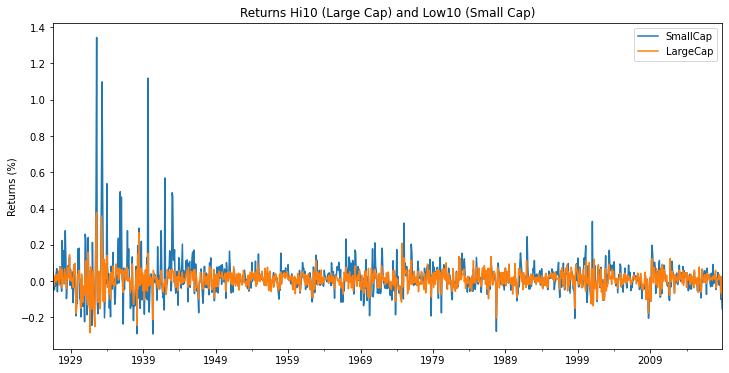

In [25]:
_ = df_rets.plot.line(figsize=(12,6), title='Returns Hi10 (Large Cap) and Low10 (Small Cap)', xlabel='', ylabel='Returns (%)')

### Drawdowns

Pasos:
- Convertir la serie temporal de rendimientos en una serie temporal que represente un índice de riqueza
- Calcular una serie temporal de los picos anteriores
- Calcular la reducción como la diferencia entre el pico anterior y el valor actual

#### Cálculo

In [26]:
def drawdowns(stock_returns, capital_inicial=1000):
    """
    Toma una serie temporal de rendimientos de activos y devuelve un DataFrame
    con columnas para:
        - El índice de riqueza (wealth index).
        - Picos anteriores (previous peak).
        - El drowdown porcentual. 
        
    Args:
    ------
    stock_returns [{pandas.Series}] -- Serie de retornos de un activo.
    
    Returns:
    ------ 
    df_drawdowns [{pandas.DataFrame}] -- Dataframe de drawdowns cuyas columnas 
                                         corresponden con el índice de riqueza,
                                         los picos previos y el drawdown.
    """
    df_drawdowns = pd.DataFrame()
    
    # Calcular índice de riqueza = Crecimiendo de cada unidad monetaria del capital inicial
    df_drawdowns['Wealth_Index'] = capital_inicial*(1 + stock_returns).cumprod() 
    
    # Calcular picos previos
    df_drawdowns['Previous_Peaks'] = df_drawdowns['Wealth_Index'].cummax()
    
    # Calcular drowdown en valor porcentual
    df_drawdowns['Drawdown'] = (df_drawdowns['Wealth_Index'] - df_drawdowns['Previous_Peaks'])/df_drawdowns['Previous_Peaks']
    
    return df_drawdowns

In [27]:
# Calcular drawdowns de LargeCap (lc) y SmallCap (sc)
df_drawdowns_lc = drawdowns(stock_returns = df_rets['LargeCap'], capital_inicial=1000)
df_drawdowns_sc = drawdowns(stock_returns = df_rets['SmallCap'], capital_inicial=1000)

In [28]:
df_drawdowns_lc

,Wealth_Index,Previous_Peaks,Drawdown
1926-07,1.032900e+03,1.032900e+03,0.000000
1926-08,1.071117e+03,1.071117e+03,0.000000
1926-09,1.078294e+03,1.078294e+03,0.000000
1926-10,1.052091e+03,1.078294e+03,-0.024300
1926-11,1.080498e+03,1.080498e+03,0.000000
...,...,...,...
2018-08,4.175915e+06,4.175915e+06,0.000000
2018-09,4.212246e+06,4.212246e+06,0.000000
2018-10,3.935501e+06,4.212246e+06,-0.065700
2018-11,4.035069e+06,4.212246e+06,-0.042062


In [29]:
df_drawdowns_sc

,Wealth_Index,Previous_Peaks,Drawdown
1926-07,9.855000e+02,9.855000e+02,0.000000
1926-08,1.035958e+03,1.035958e+03,0.000000
1926-09,1.045592e+03,1.045592e+03,0.000000
1926-10,9.949854e+02,1.045592e+03,-0.048400
1926-11,9.872245e+02,1.045592e+03,-0.055822
...,...,...,...
2018-08,2.298938e+09,2.298938e+09,0.000000
2018-09,2.260316e+09,2.298938e+09,-0.016800
2018-10,2.033832e+09,2.298938e+09,-0.115317
2018-11,1.959597e+09,2.298938e+09,-0.147608


In [30]:
def max_drawdown(drawdowns):
    """
    Calcular Max Drawdown a partir de la serie temporal de drawdowns para
    delvolver su valor y su marca temporal
    
    Args:
    -----
    drawdowns [{pandas.Series}] -- Drawdowns
    """
    # Calcular Max Drawdown
    max_drawdown = drawdowns.min()
    date_max_drawdown = drawdowns.idxmin()

    return max_drawdown, date_max_drawdown.strftime('%Y-%m')

In [31]:
# Calcular Max Drawdown
sc_max_drawdown, sc_date_max_drawdown = max_drawdown(df_drawdowns_sc["Drawdown"])
lc_max_drawdown, lc_date_max_drawdown = max_drawdown(df_drawdowns_lc["Drawdown"])

print('Max Drawdown:')
print(f'\t- Small Cap = {sc_max_drawdown}. Date: {sc_date_max_drawdown}')
print(f'\t- Large Cap = {lc_max_drawdown}. Date: {lc_date_max_drawdown}')

Max Drawdown:
	- Small Cap = -0.8330007793945303. Date: 1932-05
	- Large Cap = -0.8400375277943123. Date: 1932-05


#### Visualización 

In [35]:
def plot_drawdowns(df_drawdowns, title):
    """
    Visualización drawdowns con plotly. 
    
    Args:
    -----
    df_drawdowns [{pandas.DataFrame}] -- DataFrame de drawdowns resultados de 
                                         aplicar la función drawdowns(...)
    title [{str}] -- Título del gráfico
    
    Returns:
    ------
    None
    """
    fig = make_subplots(rows=2, cols=1)

    # Formatear columna de marca temporal
    df_drawdowns['date_time'] = df_drawdowns.index
    df_drawdowns['date_time'] = df_drawdowns['date_time'].apply(str)
    df_drawdowns.reset_index(drop=True, inplace=True)
    df_drawdowns['date_time'] = pd.to_datetime(df_drawdowns['date_time'], format='%Y-%m')
    df_drawdowns.set_index('date_time', inplace=True)

    fig.add_trace(
        go.Scatter(
            x=df_drawdowns.index, 
            y=df_drawdowns['Wealth_Index'],
            mode='lines',
            name='Wealth Index',
            line = dict(color='blue', width=1)
            
        ),
        row=1,
        col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df_drawdowns.index, 
            y=df_drawdowns['Previous_Peaks'],
            mode='lines',
            name='Previous Peaks',
            line = dict(color='green', width=2, dash='dot')
        ),
        row=1,
        col=1
    )
        
    fig.add_trace(
        go.Scatter(
            x=df_drawdowns.index, 
            y=df_drawdowns['Drawdown'],
            mode='lines',
            name='Drawdown',
            line = dict(color='red', width=1)
        ),
        row=2,
        col=1
    )
    
    # Calcular max drawdown
    date_max_drawdown = df_drawdowns["Drawdown"].idxmin()
    max_drawdown = df_drawdowns.loc[date_max_drawdown]['Drawdown']

    df_drawdowns['MaxDrawdown'] = np.nan
    df_drawdowns.loc[date_max_drawdown, 'MaxDrawdown'] = max_drawdown

    fig.add_trace(
        go.Scatter(
            x=df_drawdowns.index, 
            y=df_drawdowns['MaxDrawdown'],
            mode='markers',
            name='Max Drawdown',
            marker=dict(
                color='black',
                size=10,
                opacity=0.8,
                symbol='triangle-up'
            )),
        row=2,
        col=1
    )

    fig.update_layout(height=600, width=1000, title_text=title)
    fig.update_traces(hovertemplate="%{y:.5f}")

    fig.update_yaxes(tickprefix="")

    fig.update_xaxes(
        showspikes=True, spikethickness=2, spikecolor="#999999", spikemode="across"
    )

    fig.update_layout(
        hovermode="x unified",
        hoverdistance=200,
        spikedistance=200,
        transition_duration=500,
    )

    fig.show()

In [36]:
plot_drawdowns(df_drawdowns_lc, title='DrawDowns Large Capital')

In [37]:
plot_drawdowns(df_drawdowns_sc, title='DrawDowns Small Capital')

#### Visualización sobre un tramo temporal

In [38]:
max_year='1950'
plot_drawdowns(df_drawdowns_sc.loc[:max_year], title='DrawDowns Small Capital')

In [39]:
max_year='1950'
plot_drawdowns(df_drawdowns_lc.loc[:max_year], title='DrawDowns Large Capital')